<a href="https://colab.research.google.com/github/Abhishek2104200/QML/blob/main/qnn%26vqc_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd

# Load your full feature dataset
file_path = '/content/drive/MyDrive/balanced_sars_cov2_variants.csv'
df = pd.read_csv(file_path)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (75000, 30)


/tmp/ipython-input-3-1843703555.py:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Accession,Organism_Name,GenBank_RefSeq,Submitters,Organization,Org_location,Release_Date,Pangolin,PangoVersions,Surveillance_Sampling,...,Country,USA,Host,Tissue_Specimen_Source,Collection_Date,BioSample,BioProject,GenBank_Title,Variant_Group,WHO_Variant
0,OX474929.1,Severe acute respiratory syndrome coronavirus 2,GenBank,NaN,"Northumbria University, Newcastle upon Tyne, N...",NaN,2023-04-29,B,4.3.1/1.31/v0.1.12/0.3.19/0.6.2,NaN,...,United Kingdom,NaN,Homo sapiens,NaN,2020-03-17,SAMEA7079119,PRJEB37886,Severe acute respiratory syndrome coronavirus ...,B,Alpha
1,MZ185301.1,Severe acute respiratory syndrome coronavirus 2,GenBank,"Howard,D., Batra,D., Cook,P.W., Moser,K., Pask...","Centers for Disease Control and Prevention, Re...",USA,2021-05-13,B.1.526,4.3.1/1.31/v0.1.12/0.3.19/0.6.2,True,...,USA,ME,Homo sapiens,oronasopharynx,2021-04-29,SAMN22689283,PRJNA731148,Severe acute respiratory syndrome coronavirus ...,B,Alpha
2,OU389953.1,Severe acute respiratory syndrome coronavirus 2,GenBank,NaN,London,United Kingdom,2021-07-13,B.1.1.7,4.3.1/1.31/v0.1.12/0.3.19/0.6.2,NaN,...,United Kingdom,NaN,Homo sapiens,NaN,2021-01-11,SAMEA8368730,PRJEB37886,Severe acute respiratory syndrome coronavirus ...,B,Alpha
3,OX597302.1,Severe acute respiratory syndrome coronavirus 2,GenBank,NaN,"Public Health Wales Microbiology Cardiff, Univ...",NaN,2023-05-13,B.1.177.15,4.3.1/1.31/v0.1.12/0.3.19/0.6.2,NaN,...,United Kingdom,NaN,Homo sapiens,NaN,2020-12-01,SAMEA7813988,PRJEB37886,Severe acute respiratory syndrome coronavirus ...,B,Alpha
4,PP603966.1,Severe acute respiratory syndrome coronavirus 2,GenBank,"Amin,H., Wang,J., Su,M., Akther,S., Bologna,J....","NYC DOHMH, Bureau of the Public Health Laboratory",USA,2024-04-09,B.1.1.434,4.3.1/1.31/v0.1.12/0.3.19/0.6.2,NaN,...,USA,NaN,Homo sapiens,NaN,2021-02-10,SAMN20961554,PRJNA704697,Severe acute respiratory syndrome coronavirus ...,B,Alpha


In [ ]:
df.columns

Index(['Accession', 'Organism_Name', 'GenBank_RefSeq', 'Submitters',
       'Organization', 'Org_location', 'Release_Date', 'Pangolin',
       'PangoVersions', 'Surveillance_Sampling', 'Isolate', 'Species', 'Genus',
       'Family', 'Molecule_type', 'Length', 'Nuc_Completeness', 'Genotype',
       'Segment', 'Geo_Location', 'Country', 'USA', 'Host',
       'Tissue_Specimen_Source', 'Collection_Date', 'BioSample', 'BioProject',
       'GenBank_Title', 'Variant_Group', 'WHO_Variant'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



# Drop purely ID-related or non-informative columns
drop_cols = [
    'Accession', 'GenBank_RefSeq', 'Submitters', 'Organization',
    'BioSample', 'BioProject', 'GenBank_Title', 'Isolate'
]
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Handle date columns: convert to datetime and then to numeric
for col in ['Release_Date', 'Collection_Date']:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df[col] = (df[col] - df[col].min()).dt.days  # Days since earliest date

# Fill missing numerical values with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with 'Unknown'
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")

# Encode categorical features using LabelEncoder (can switch to OneHot for tree models)
encoders = {}
# Convert boolean columns to string (so they can be handled like categories)
for col in cat_cols:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(str)
 # save if you need to inverse-transform later

# Final feature and label separation
X = df.drop(columns=['WHO_Variant'])
y = df['WHO_Variant']
y = LabelEncoder().fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
df.columns


Index(['Organism_Name', 'Org_location', 'Release_Date', 'Pangolin',
       'PangoVersions', 'Surveillance_Sampling', 'Species', 'Genus', 'Family',
       'Molecule_type', 'Length', 'Nuc_Completeness', 'Genotype', 'Segment',
       'Geo_Location', 'Country', 'USA', 'Host', 'Tissue_Specimen_Source',
       'Collection_Date', 'Variant_Group', 'WHO_Variant'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify object-type columns (including those with 'Unknown')
object_cols = X.select_dtypes(include=['object']).columns

# Encode each using LabelEncoder
for col in object_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))


In [ ]:
# Re-split with cleaned X
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9991333333333333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       1.00      1.00      1.00      3000
           2       1.00      1.00      1.00      3000
           3       1.00      1.00      1.00      3000
           4       1.00      1.00      1.00      3000

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



In [ ]:


import torch

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select exactly 10 features (can be top features or first 10)
X_qml = X.iloc[:, :10].copy()

# Normalize to [0, π] for angle embedding
scaler = MinMaxScaler(feature_range=(0, np.pi))
X_qml = scaler.fit_transform(X_qml)

# Train-test split
Xq_train, Xq_test, yq_train, yq_test = train_test_split(X_qml, y, stratify=y, test_size=0.2, random_state=42)

# Convert to torch tensors
Xq_train_tensor = torch.tensor(Xq_train, dtype=torch.float32)
yq_train_tensor = torch.tensor(yq_train, dtype=torch.long)
Xq_test_tensor = torch.tensor(Xq_test, dtype=torch.float32)
yq_test_tensor = torch.tensor(yq_test, dtype=torch.long)


In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 42.4 MB/s eta 0:00:00


# **VQC**

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import torch.nn as nn
import torch.optim as optim

n_qubits = 10
n_classes = 5
dev = qml.device("default.qubit", wires=n_qubits)

from pennylane.templates import BasicEntanglerLayers

def quantum_layer(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits), rotation='Y')
    BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

weight_shapes = {"weights": (2, n_qubits)}

@qml.qnode(dev, interface="torch", diff_method="backprop")
def qnode(inputs, weights):
    return quantum_layer(inputs, weights)

qlayer = qml.qnn.TorchLayer(qnode, weight_shapes)


In [ ]:
class QuantumClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.q_layer = qlayer
        self.post_net = nn.Sequential(
            nn.Linear(n_qubits, 16),
            nn.ReLU(),
            nn.Linear(16, n_classes)
        )

    def forward(self, x):
        x = self.q_layer(x)
        x = self.post_net(x)
        return x

model = QuantumClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create dataset and loader
batch_size = 64
train_dataset = TensorDataset(Xq_train_tensor, yq_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
epochs = 20
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * X_batch.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    accuracy = 100. * correct / total
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/total:.4f}, Accuracy: {accuracy:.2f}%")


Epoch 1/20, Loss: 0.5402, Accuracy: 82.49%
Epoch 2/20, Loss: 0.2510, Accuracy: 92.33%
Epoch 3/20, Loss: 0.2113, Accuracy: 93.41%
Epoch 4/20, Loss: 0.1904, Accuracy: 93.97%
Epoch 5/20, Loss: 0.1768, Accuracy: 94.44%
Epoch 6/20, Loss: 0.1645, Accuracy: 94.71%
Epoch 7/20, Loss: 0.1575, Accuracy: 94.95%
Epoch 8/20, Loss: 0.1489, Accuracy: 95.14%
Epoch 9/20, Loss: 0.1422, Accuracy: 95.44%
Epoch 10/20, Loss: 0.1389, Accuracy: 95.59%
Epoch 11/20, Loss: 0.1340, Accuracy: 95.71%
Epoch 12/20, Loss: 0.1317, Accuracy: 95.80%
Epoch 13/20, Loss: 0.1280, Accuracy: 95.89%
Epoch 14/20, Loss: 0.1256, Accuracy: 96.02%
Epoch 15/20, Loss: 0.1217, Accuracy: 96.14%
Epoch 16/20, Loss: 0.1213, Accuracy: 96.15%
Epoch 17/20, Loss: 0.1186, Accuracy: 96.22%
Epoch 18/20, Loss: 0.1171, Accuracy: 96.29%
Epoch 19/20, Loss: 0.1165, Accuracy: 96.34%
Epoch 20/20, Loss: 0.1151, Accuracy: 96.33%


In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(Xq_test_tensor)
    predictions = torch.argmax(test_outputs, dim=1)

from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(yq_test_tensor, predictions))



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      3000
           1       0.98      0.97      0.97      3000
           2       0.97      1.00      0.98      3000
           3       0.91      0.98      0.94      3000
           4       0.99      0.94      0.97      3000

    accuracy                           0.96     15000
   macro avg       0.96      0.96      0.96     15000
weighted avg       0.96      0.96      0.96     15000



# **QNN**

In [ ]:
n_qubits = 10
n_features = 10
reupload_layers = 3  # you can tune this
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch", diff_method="backprop")
def reuploading_qnode(inputs, weights):
    for l in range(reupload_layers):
        qml.AngleEmbedding(inputs, wires=range(n_qubits), rotation='Y')
        for i in range(n_qubits):
            qml.RX(weights[l, i, 0], wires=i)
            qml.RY(weights[l, i, 1], wires=i)
            qml.RZ(weights[l, i, 2], wires=i)
        for i in range(n_qubits):
            qml.CZ(wires=[i, (i + 1) % n_qubits])  # manual ring entanglement
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]


# Define weight shapes for each layer
weight_shapes = {"weights": (reupload_layers, n_qubits, 3)}
qlayer = qml.qnn.TorchLayer(reuploading_qnode, weight_shapes)


In [ ]:
class ReuploadingQNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.q_layer = qlayer
        self.post_net = nn.Sequential(
            nn.Linear(n_qubits, 16),
            nn.ReLU(),
            nn.Linear(16, n_classes)
        )

    def forward(self, x):
        x = self.q_layer(x)
        x = self.post_net(x)
        return x


In [ ]:
model = ReuploadingQNN()
optimizer = optim.Adam(model.parameters(), lr=0.01)


(<Figure size 4500x1100 with 1 Axes>, <Axes: >)

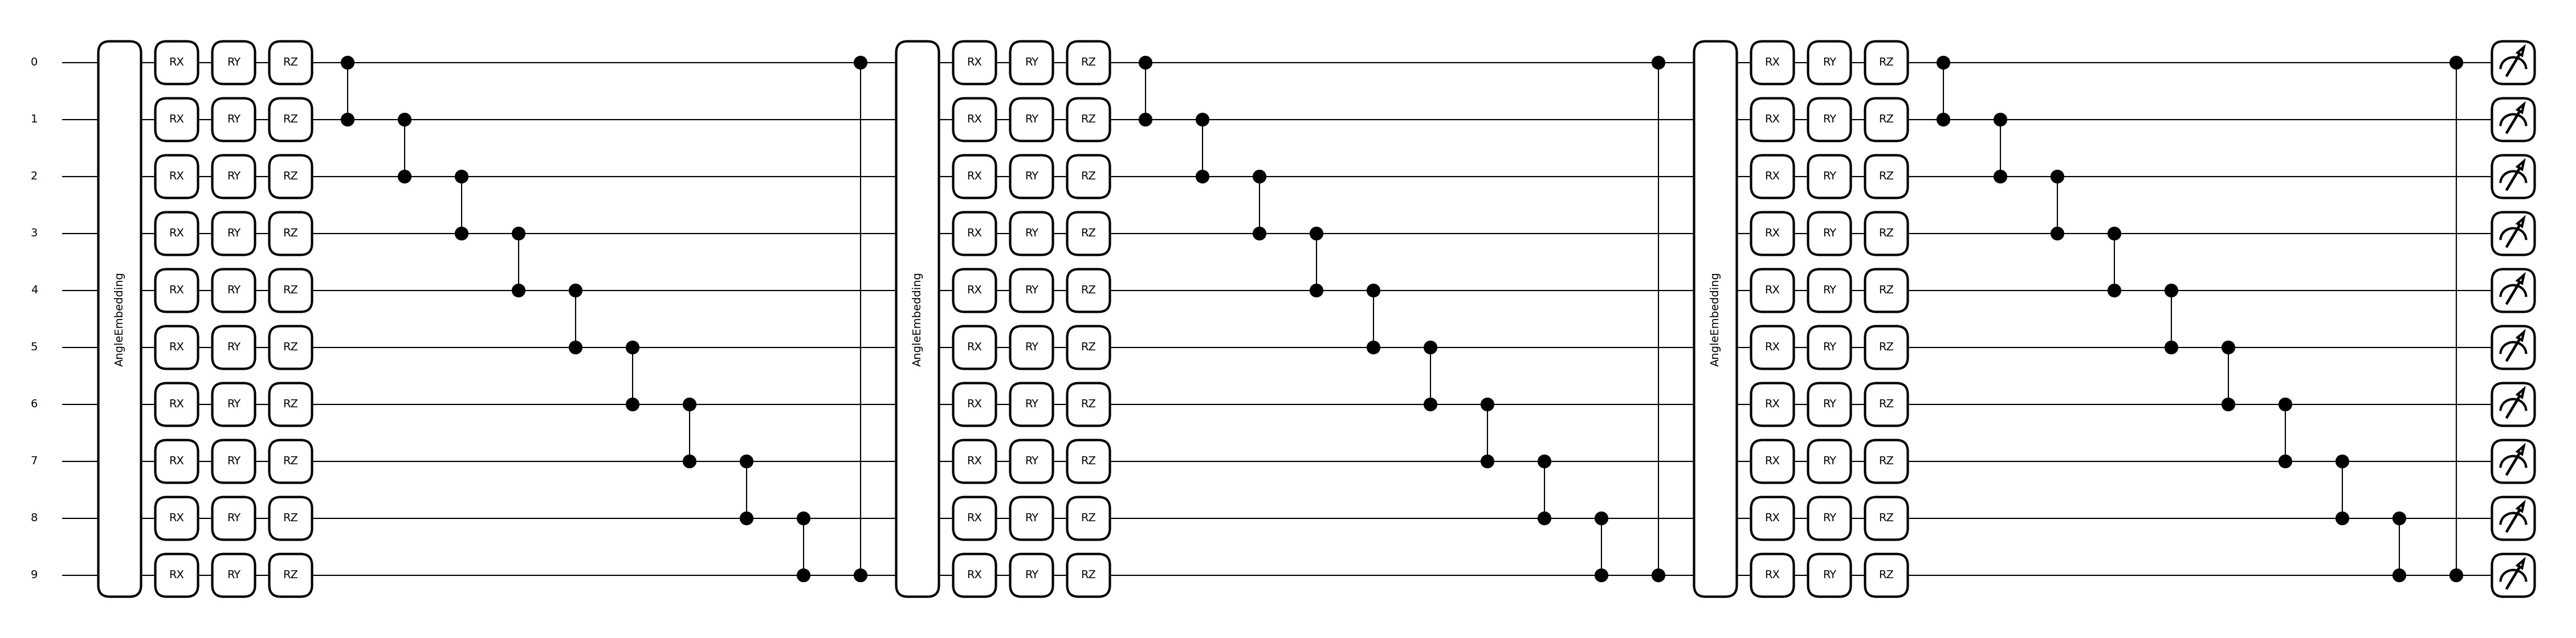

In [ ]:
qml.draw_mpl(reuploading_qnode)(inputs=torch.randn(n_qubits), weights=torch.randn(reupload_layers, n_qubits, 3))


In [ ]:
from pennylane import draw

# This gives you a string you can render or export
drawer = draw(reuploading_qnode)
circuit_diagram_str = drawer(inputs=torch.randn(n_qubits), weights=torch.randn(reupload_layers, n_qubits, 3))

# Print to console (nice for quick check)
print(circuit_diagram_str)


0: ─╭AngleEmbedding(M0)──RX(1.74)───RY(-1.03)──RZ(0.20)──╭●─────────────────────────╭Z ···
1: ─├AngleEmbedding(M0)──RX(-0.68)──RY(-0.14)──RZ(0.93)──╰Z─╭●──────────────────────│─ ···
2: ─├AngleEmbedding(M0)──RX(0.18)───RY(1.41)───RZ(0.36)─────╰Z─╭●───────────────────│─ ···
3: ─├AngleEmbedding(M0)──RX(-0.43)──RY(0.89)───RZ(1.47)────────╰Z─╭●────────────────│─ ···
4: ─├AngleEmbedding(M0)──RX(-0.99)──RY(-0.26)──RZ(0.33)───────────╰Z─╭●─────────────│─ ···
5: ─├AngleEmbedding(M0)──RX(0.98)───RY(0.18)───RZ(0.21)──────────────╰Z─╭●──────────│─ ···
6: ─├AngleEmbedding(M0)──RX(0.77)───RY(0.65)───RZ(0.69)─────────────────╰Z─╭●───────│─ ···
7: ─├AngleEmbedding(M0)──RX(0.66)───RY(0.04)───RZ(1.26)────────────────────╰Z─╭●────│─ ···
8: ─├AngleEmbedding(M0)──RX(0.97)───RY(0.48)───RZ(-1.37)──────────────────────╰Z─╭●─│─ ···
9: ─╰AngleEmbedding(M0)──RX(0.31)───RY(1.78)───RZ(-0.18)─────────────────────────╰Z─╰● ···

0: ··· ─╭AngleEmbedding(M0)──RX(0.08)───RY(-1.36)──RZ(-1.07)─╭●─────────────────────────╭

/tmp/ipython-input-64-1116522007.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


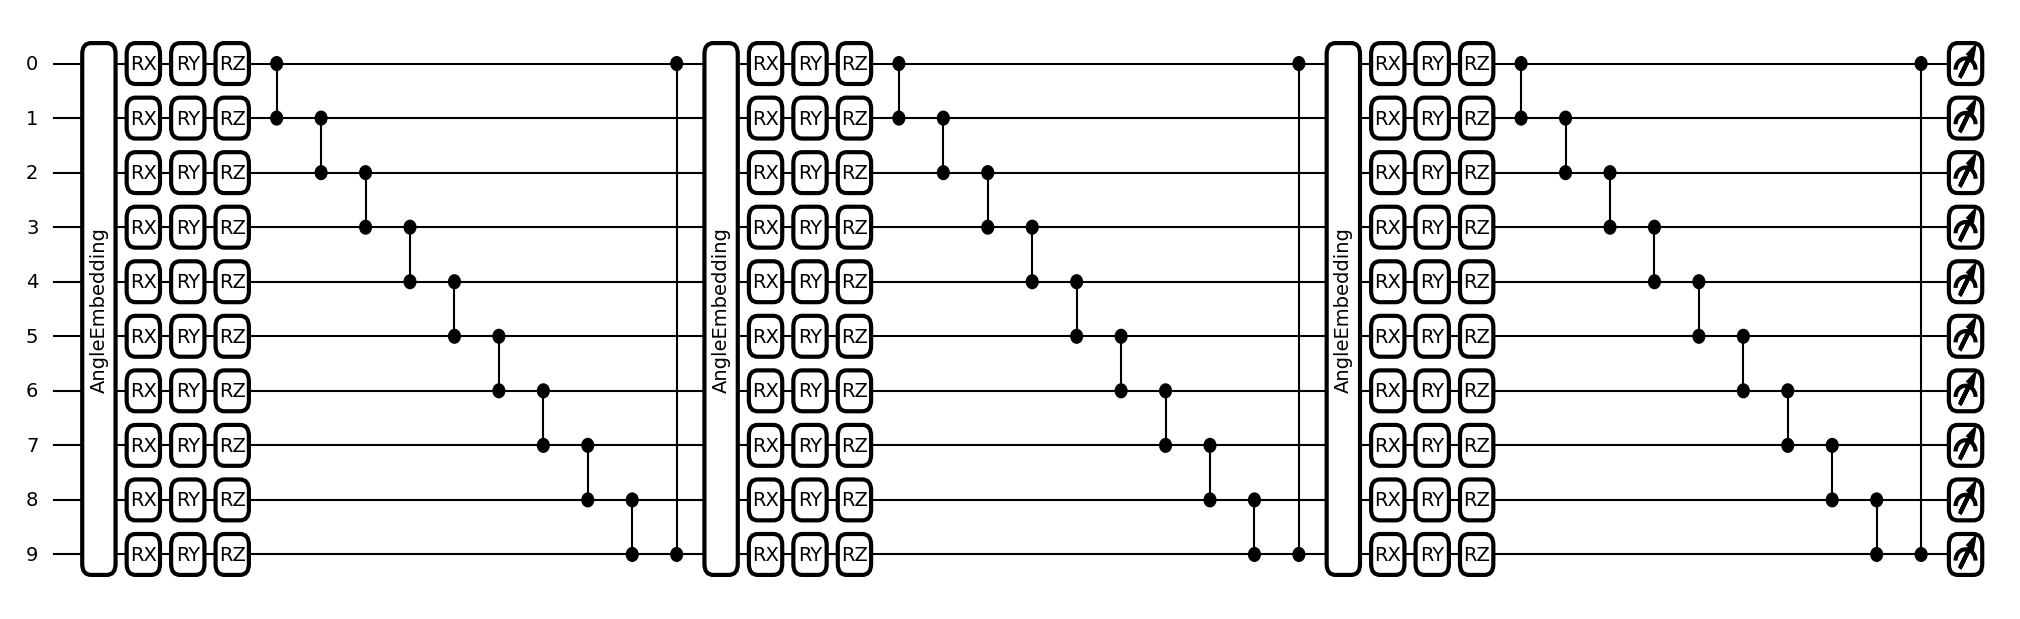

In [ ]:
import pennylane as qml
import matplotlib.pyplot as plt

n_qubits = 10
reupload_layers = 3

# Setup a dummy device
dev = qml.device("default.qubit", wires=n_qubits)

# Define a QNode that contains all 3 reuploading layers
@qml.qnode(dev)
def full_circuit():
    for l in range(reupload_layers):
        qml.AngleEmbedding([0.1] * n_qubits, wires=range(n_qubits), rotation='Y')
        for i in range(n_qubits):
            qml.RX(0.1, wires=i)
            qml.RY(0.2, wires=i)
            qml.RZ(0.3, wires=i)
        for i in range(n_qubits):
            qml.CZ(wires=[i, (i + 1) % n_qubits])
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# Draw and save at high resolution
fig, ax = qml.draw_mpl(full_circuit)()
fig.set_size_inches(20, 6)  # Wider for clarity
plt.tight_layout()
plt.savefig("qnn_full_circuit_layers.png", dpi=400)  # High-resolution PNG
plt.show()


In [ ]:
from google.colab import files
files.download("qnn_full_circuit_layers.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Epoch 1/20, Loss: 0.3699, Accuracy: 88.58%
Epoch 2/20, Loss: 0.1720, Accuracy: 95.15%
Epoch 3/20, Loss: 0.1562, Accuracy: 95.51%
Epoch 4/20, Loss: 0.1429, Accuracy: 95.83%
Epoch 5/20, Loss: 0.1367, Accuracy: 95.89%
Epoch 6/20, Loss: 0.1296, Accuracy: 96.07%
Epoch 7/20, Loss: 0.1279, Accuracy: 95.99%
Epoch 8/20, Loss: 0.1203, Accuracy: 96.22%
Epoch 9/20, Loss: 0.1185, Accuracy: 96.25%
Epoch 10/20, Loss: 0.1183, Accuracy: 96.16%
Epoch 11/20, Loss: 0.1136, Accuracy: 96.28%
Epoch 12/20, Loss: 0.1130, Accuracy: 96.27%
Epoch 13/20, Loss: 0.1118, Accuracy: 96.29%
Epoch 14/20, Loss: 0.1090, Accuracy: 96.27%
Epoch 15/20, Loss: 0.1068, Accuracy: 96.37%
Epoch 16/20, Loss: 0.1031, Accuracy: 96.46%
Epoch 17/20, Loss: 0.1077, Accuracy: 96.27%
Epoch 18/20, Loss: 0.1026, Accuracy: 96.49%
Epoch 19/20, Loss: 0.1038, Accuracy: 96.45%
Epoch 20/20, Loss: 0.0969, Accuracy: 96.61%


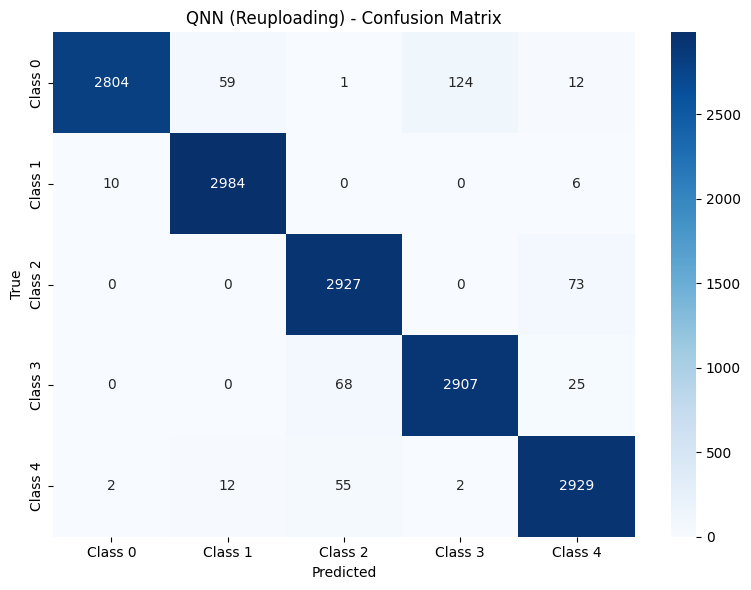


Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.93      0.96      3000
     Class 1       0.98      0.99      0.99      3000
     Class 2       0.96      0.98      0.97      3000
     Class 3       0.96      0.97      0.96      3000
     Class 4       0.96      0.98      0.97      3000

    accuracy                           0.97     15000
   macro avg       0.97      0.97      0.97     15000
weighted avg       0.97      0.97      0.97     15000



In [ ]:
epochs = 20
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * X_batch.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    accuracy = 100. * correct / total
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/total:.4f}, Accuracy: {accuracy:.2f}%")


from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate on test set directly
model.eval()
with torch.no_grad():
    test_outputs = model(Xq_test_tensor)
    predictions = torch.argmax(test_outputs, dim=1)

# Convert to numpy
y_true = yq_test_tensor.cpu().numpy()
y_pred = predictions.cpu().numpy()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = [f"Class {i}" for i in range(n_classes)]  # or actual variant names if available

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('QNN (Reuploading) - Confusion Matrix')
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=labels))



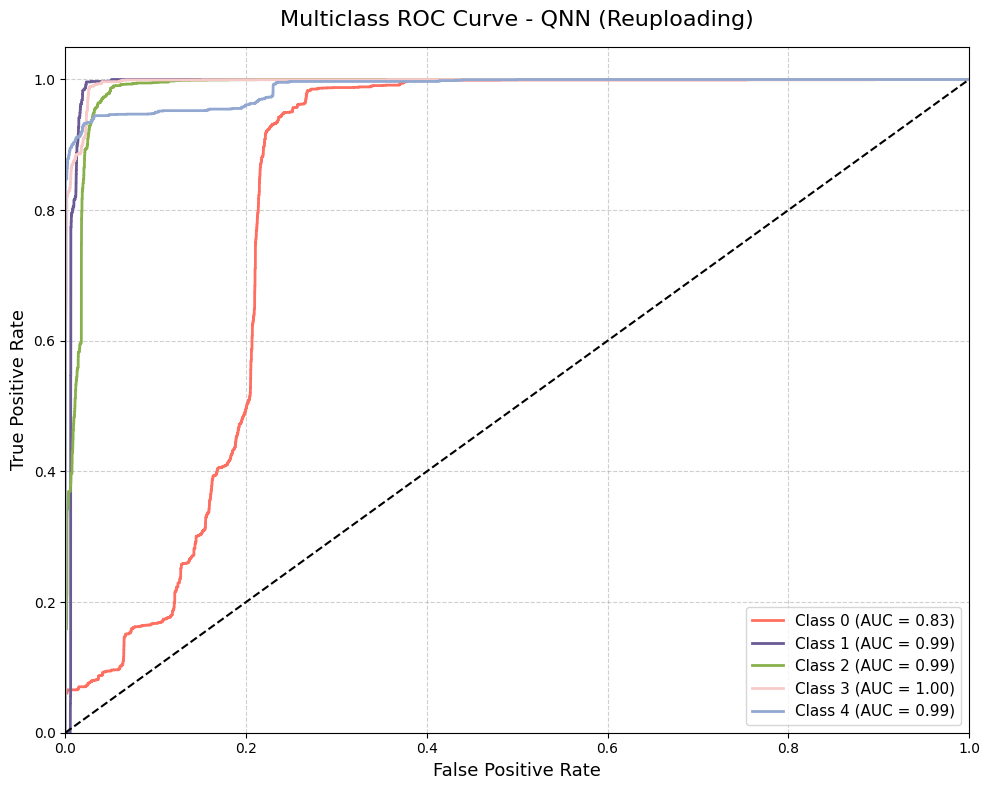

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Ground truth and predicted probabilities
y_test = yq_test_tensor.cpu().numpy()
y_score = test_outputs.cpu().numpy()

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))

# ROC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Professional ROC plot
plt.figure(figsize=(10, 8))
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, color=colors[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('Multiclass ROC Curve - QNN (Reuploading)', fontsize=16, pad=15)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("qnn_multiclass_roc.png", dpi=300)
plt.show()


In [ ]:
torch.save(model.state_dict(), "reuploading_qnn_model.pth")


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


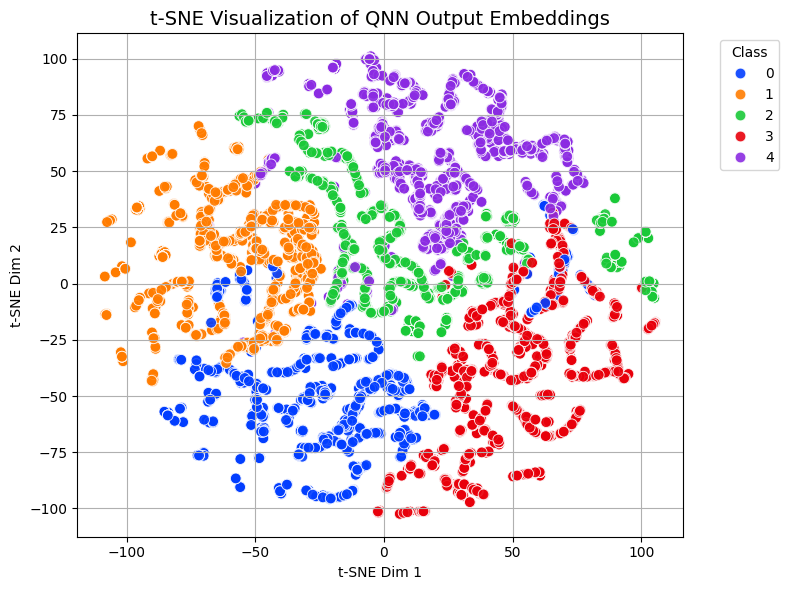

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Extract QNN outputs and true labels using your defined test tensors
model.eval()
with torch.no_grad():
    qnn_outputs = model(Xq_test_tensor.to(device))
    true_labels = yq_test_tensor.to(device)

# Step 2: Convert to numpy for t-SNE
qnn_outputs_np = qnn_outputs.cpu().numpy()
true_labels_np = true_labels.cpu().numpy()

# Step 3: Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
qnn_tsne = tsne.fit_transform(qnn_outputs_np)

# Step 4: Plot t-SNE
plt.figure(figsize=(8, 6))
palette = sns.color_palette("bright", len(set(true_labels_np)))
sns.scatterplot(x=qnn_tsne[:, 0], y=qnn_tsne[:, 1], hue=true_labels_np, palette=palette, s=60, alpha=0.9)
plt.title("t-SNE Visualization of QNN Output Embeddings", fontsize=14)
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install captum --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21

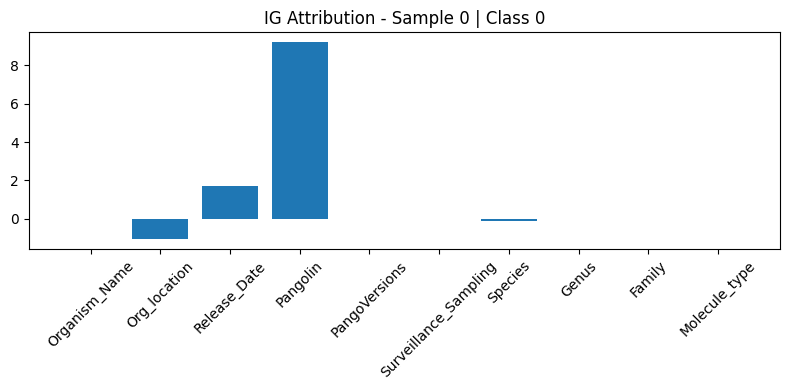

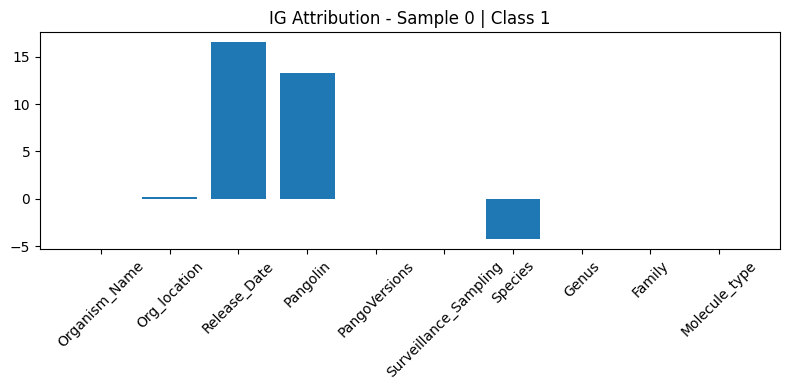

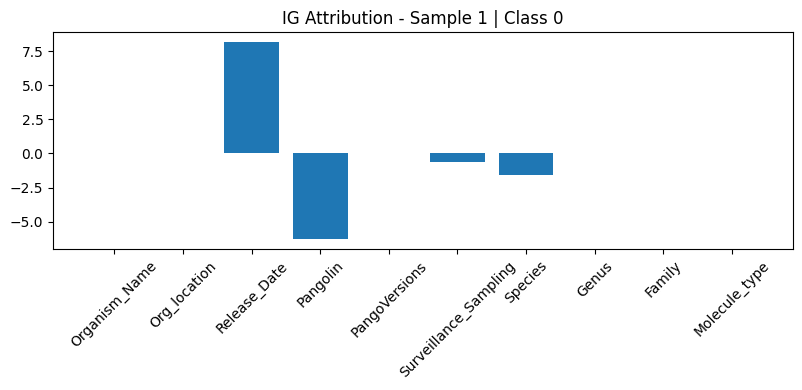

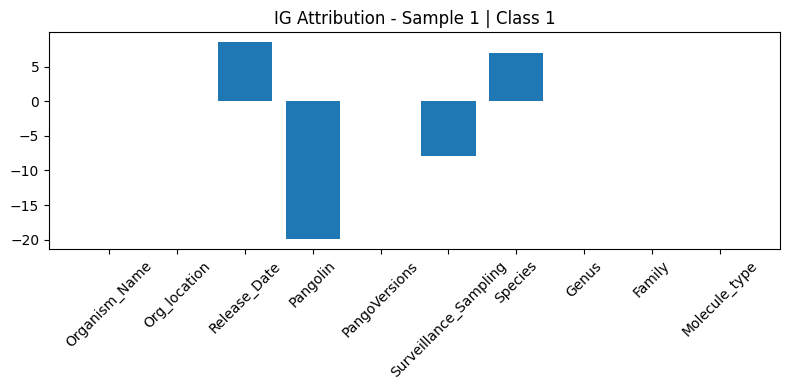

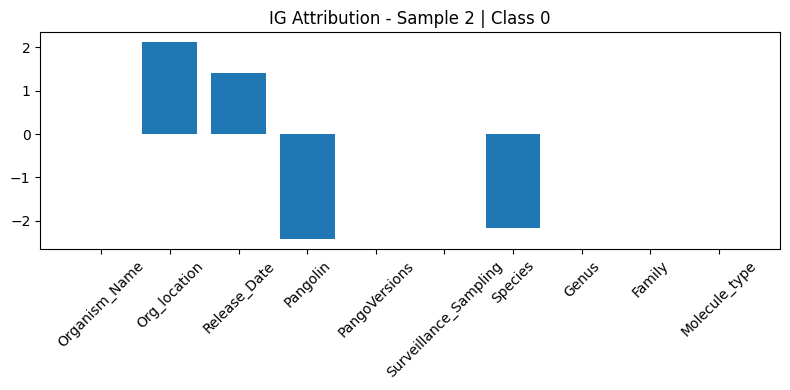

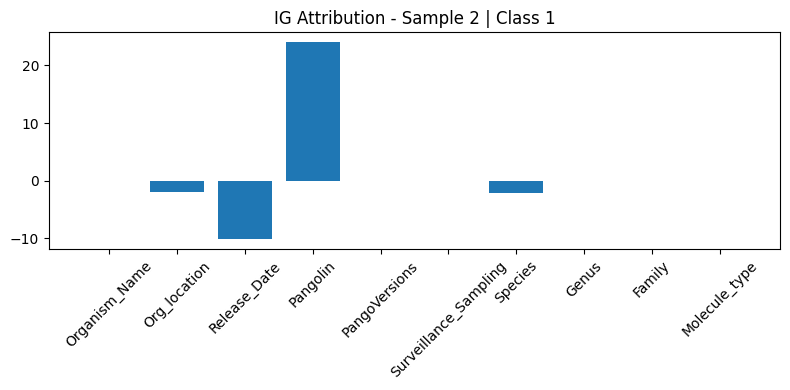

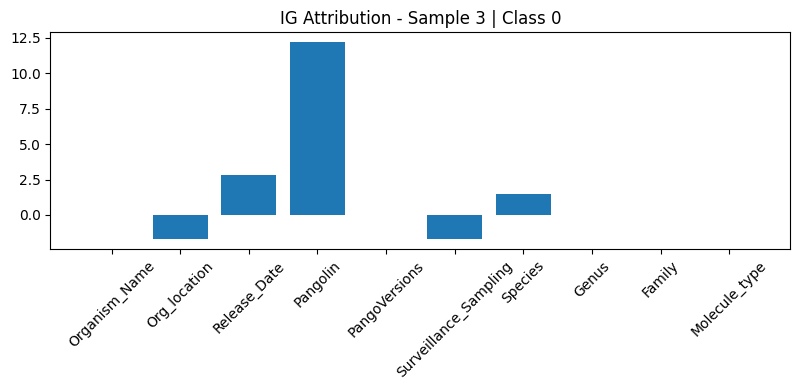

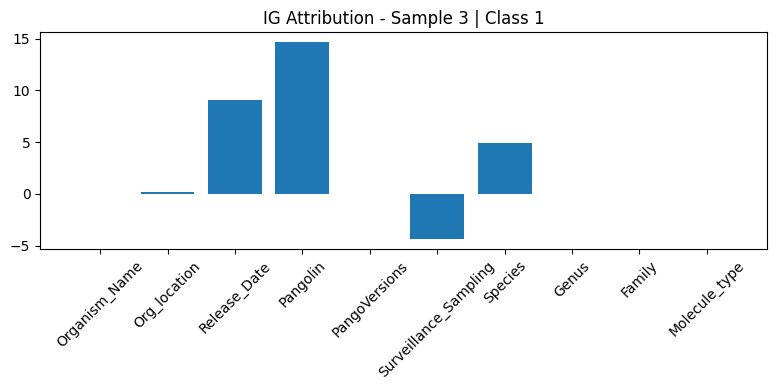

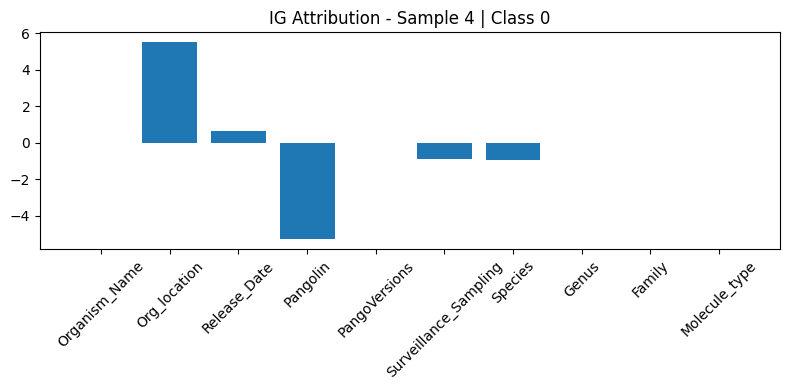

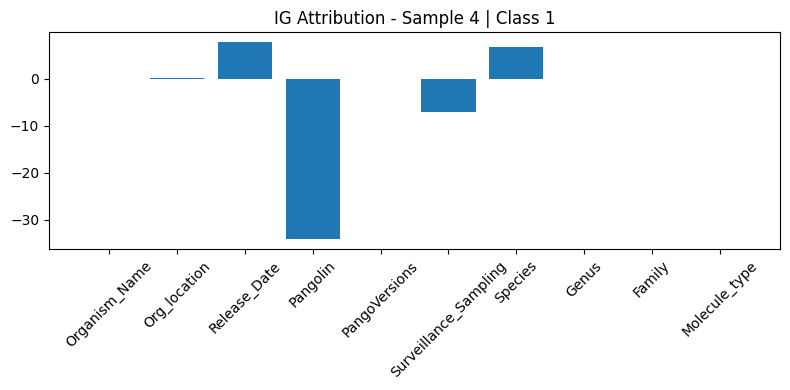

In [ ]:
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt
import numpy as np

ig = IntegratedGradients(model)

# Set how many test samples you want to visualize
num_samples = 5

for idx in range(num_samples):
    input_sample = Xq_test_tensor[idx].unsqueeze(0).to(device)

    for target_class in range(2):  # Assuming binary classification: Class 0 and 1
        attr, _ = ig.attribute(input_sample, target=target_class, return_convergence_delta=True)
        attributions = attr.squeeze().detach().cpu().numpy()

        plt.figure(figsize=(8, 4))
        plt.title(f"IG Attribution - Sample {idx} | Class {target_class}")
        plt.bar(range(len(feature_names)), attributions)
        plt.xticks(range(len(feature_names)), feature_names, rotation=45)
        plt.tight_layout()
        plt.show()


<Axes: >

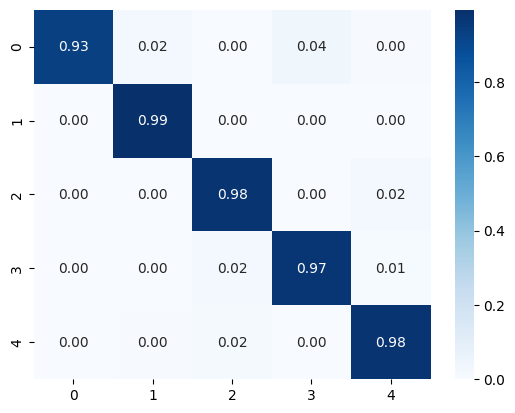

In [ ]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2f')


In [ ]:
import matplotlib.pyplot as plt

def plot_weight_distribution(model):
    all_weights = []
    for name, param in model.named_parameters():
        if 'weight' in name and param.requires_grad:
            all_weights.extend(param.detach().cpu().numpy().flatten())

    plt.figure(figsize=(6, 4))
    plt.hist(all_weights, bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of Trained Weights')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


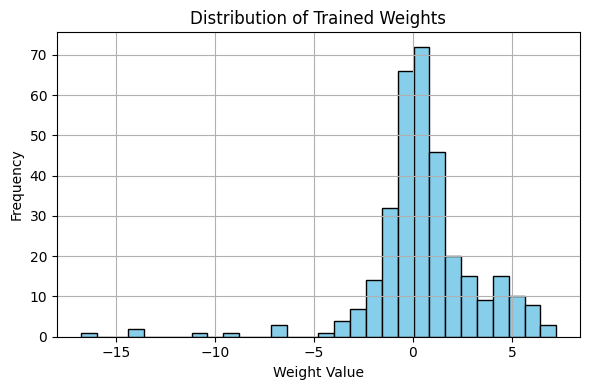

In [ ]:
plot_weight_distribution(model)


In [ ]:
import matplotlib.pyplot as plt

def plot_weight_distribution(model):
    all_weights = []
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"Collecting from: {name}")
            all_weights.extend(param.detach().cpu().numpy().flatten())

    if all_weights:
        plt.figure(figsize=(6, 4))
        plt.hist(all_weights, bins=30, color='skyblue', edgecolor='black')
        plt.title('Distribution of Trained Weights')
        plt.xlabel('Weight Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("No weights found to plot.")


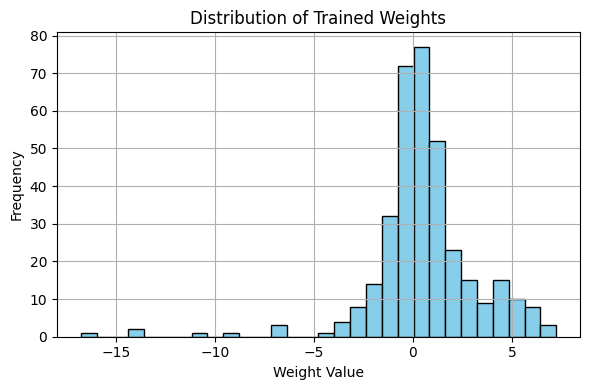

In [ ]:
plot_weight_distribution(model)

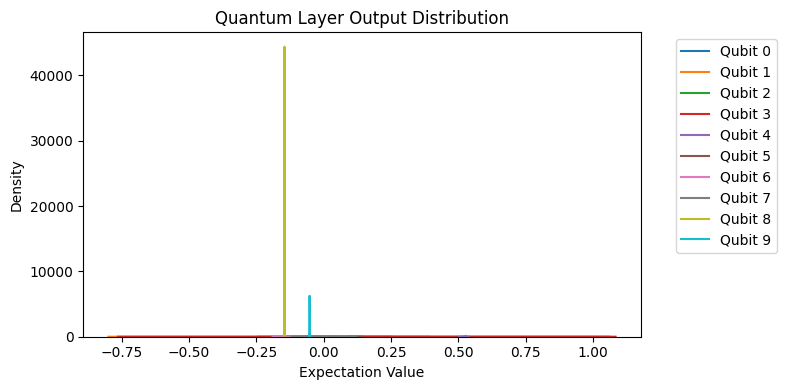

In [ ]:
model.eval()
with torch.no_grad():
    quantum_output = model.q_layer(Xq_test_tensor).detach().cpu().numpy()

plt.figure(figsize=(8, 4))
for i in range(quantum_output.shape[1]):
    sns.kdeplot(quantum_output[:, i], label=f'Qubit {i}')
plt.title('Quantum Layer Output Distribution')
plt.xlabel('Expectation Value')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


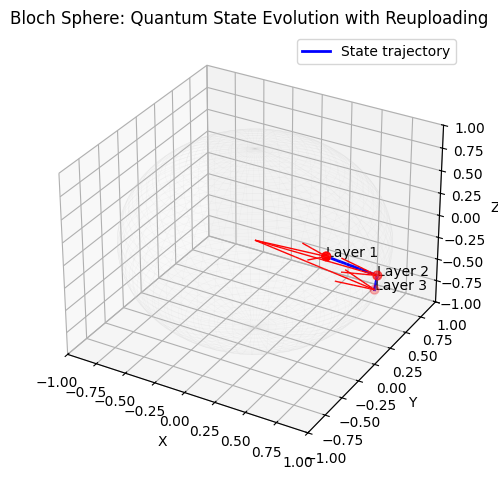

In [ ]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Setup single-qubit device
dev = qml.device("default.qubit", wires=1)

# Define circuit that mimics one reuploading layer: AngleEmbedding + parameterized RX
def bloch_coords(x, w):
    @qml.qnode(dev)
    def circuit():
        qml.RY(x, wires=0)
        qml.RX(w, wires=0)
        return [qml.expval(qml.PauliX(0)),
                qml.expval(qml.PauliY(0)),
                qml.expval(qml.PauliZ(0))]
    return circuit()

# Simulate reuploading: fresh input each time, fixed weights for demonstration
inputs = [0.3*np.pi, 0.5*np.pi, 0.7*np.pi]   # Different input at each layer (like reuploading)
weights = [np.pi/4, np.pi/3, np.pi/5]       # Simulated learnable weights

bloch_vectors = []
for x, w in zip(inputs, weights):
    coords = bloch_coords(x, w)
    bloch_vectors.append(coords)

# Prepare 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Bloch Sphere: Quantum State Evolution with Reuploading')

# Draw Bloch sphere wireframe
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_wireframe(x_sphere, y_sphere, z_sphere, color='lightgray', linewidth=0.2, alpha=0.3)

# Convert to array for line plotting
vecs = np.array(bloch_vectors)

# Plot qubit state vector at each layer
origin = np.array([0, 0, 0])
for i, vec in enumerate(vecs):
    ax.quiver(*origin, *vec, color='red', linewidth=1)
    ax.text(*vec, f'Layer {i+1}', fontsize=10, color='black')

# Draw line showing state evolution trajectory
ax.plot(vecs[:,0], vecs[:,1], vecs[:,2], color='blue', linewidth=2, label='State trajectory')

# Mark points
ax.scatter(vecs[:,0], vecs[:,1], vecs[:,2], color='red', s=40)

ax.legend()
plt.tight_layout()
plt.show()



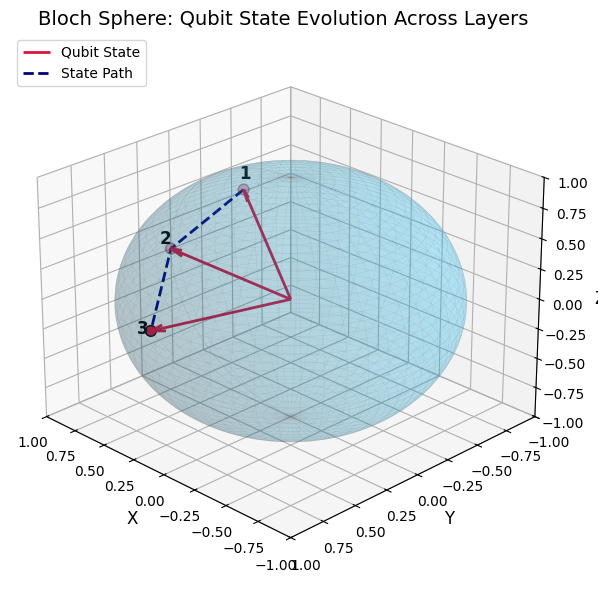

In [ ]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Setup single-qubit device
dev = qml.device("default.qubit", wires=1)

def bloch_coords(x, w):
    @qml.qnode(dev)
    def circuit():
        qml.RY(x, wires=0)
        qml.RX(w, wires=0)
        return [qml.expval(qml.PauliX(0)),
                qml.expval(qml.PauliY(0)),
                qml.expval(qml.PauliZ(0))]
    return circuit()

# Simulated reuploading inputs and weights
inputs = [0.3*np.pi, 0.5*np.pi, 0.7*np.pi]
weights = [np.pi/4, np.pi/3, np.pi/5]

bloch_vectors = []
for x, w in zip(inputs, weights):
    coords = bloch_coords(x, w)
    bloch_vectors.append(coords)
vecs = np.array(bloch_vectors)

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=25, azim=135)  # Camera angle

# Bloch sphere (solid + wireframe)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='deepskyblue', alpha=0.15, linewidth=0)
ax.plot_wireframe(x_sphere, y_sphere, z_sphere, color='gray', linewidth=0.2, alpha=0.3)

# Axes setup
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.set_title('Bloch Sphere: Qubit State Evolution Across Layers', fontsize=14)

# Origin
origin = np.array([0, 0, 0])

# Plot state vectors with annotation
for i, vec in enumerate(vecs):
    # Vector
    ax.quiver(*origin, *vec, color='crimson', arrow_length_ratio=0.1, linewidth=2, label='Qubit State' if i == 0 else "")

    # Label shifted outward
    label_vec = vec + 0.1 * vec / np.linalg.norm(vec)
    ax.text(*label_vec, f'{i+1}', color='black', fontsize=12, weight='bold')

    # Optional descriptive text (can be removed if too cluttered)
    # ax.text(*label_vec, f'Layer {i+1}', fontsize=10, color='black')

# Draw dotted path connecting states
ax.plot(vecs[:,0], vecs[:,1], vecs[:,2], color='navy', linestyle='--', linewidth=2, label='State Path')
ax.scatter(vecs[:,0], vecs[:,1], vecs[:,2], color='crimson', s=60, edgecolor='black')

# Legend
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()


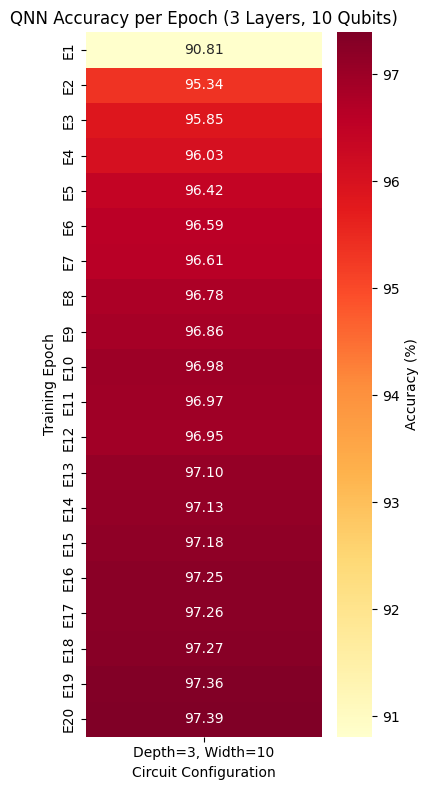

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Your configuration
depth = 3   # fixed
width = 10  # fixed
qnn_acc = [90.81, 95.34, 95.85, 96.03, 96.42, 96.59, 96.61, 96.78, 96.86, 96.98,
           96.97, 96.95, 97.10, 97.13, 97.18, 97.25, 97.26, 97.27, 97.36, 97.39]

# Convert accuracy list to 2D for heatmap (e.g., epochs x 1)
accuracy_matrix = np.array(qnn_acc).reshape(-1, 1)

# Create heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(accuracy_matrix, annot=True, fmt=".2f", cmap='YlOrRd',
            yticklabels=[f'E{i+1}' for i in range(len(qnn_acc))],
            xticklabels=[f'Depth={depth}, Width={width}'],
            cbar_kws={'label': 'Accuracy (%)'})

plt.title('QNN Accuracy per Epoch (3 Layers, 10 Qubits)')
plt.xlabel('Circuit Configuration')
plt.ylabel('Training Epoch')
plt.tight_layout()
plt.show()


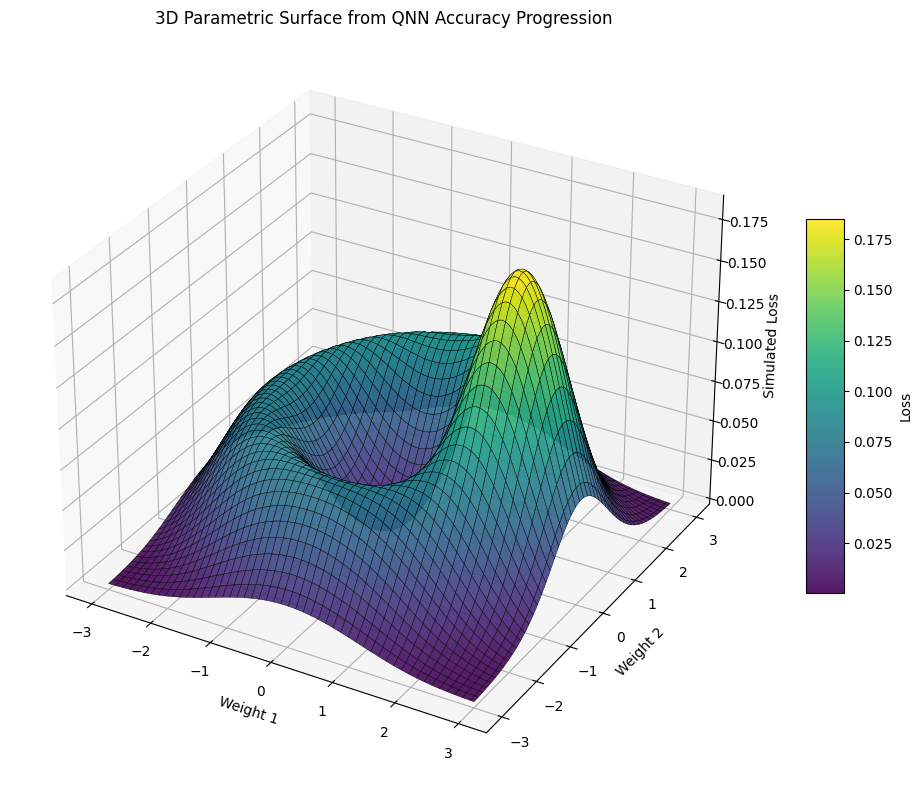

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Real QNN Accuracy (converted to simulated 'loss')
qnn_acc = [90.81, 95.34, 95.85, 96.03, 96.42, 96.59, 96.61, 96.78, 96.86, 96.98,
           96.97, 96.95, 97.10, 97.13, 97.18, 97.25, 97.26, 97.27, 97.36, 97.39]

# Simulate a "loss" curve (lower loss = higher accuracy)
loss_values = [1.0 - acc / 100 for acc in qnn_acc]

# Create meshgrid of weight parameters
W1 = np.linspace(-3, 3, 100)
W2 = np.linspace(-3, 3, 100)
W1, W2 = np.meshgrid(W1, W2)

# Use Gaussian bumps + real loss data to simulate a surface
Z = np.zeros_like(W1)
for i, loss in enumerate(loss_values):
    # Center each "epoch" at a different location on the surface
    x0 = np.cos(i / 3) * 2
    y0 = np.sin(i / 3) * 2
    Z += loss * np.exp(-((W1 - x0)**2 + (W2 - y0)**2))

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(W1, W2, Z, cmap='viridis', edgecolor='k', linewidth=0.3, alpha=0.9)

# Labels and view
ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_zlabel('Simulated Loss')
ax.set_title('3D Parametric Surface from QNN Accuracy Progression')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Loss')

plt.tight_layout()
plt.show()


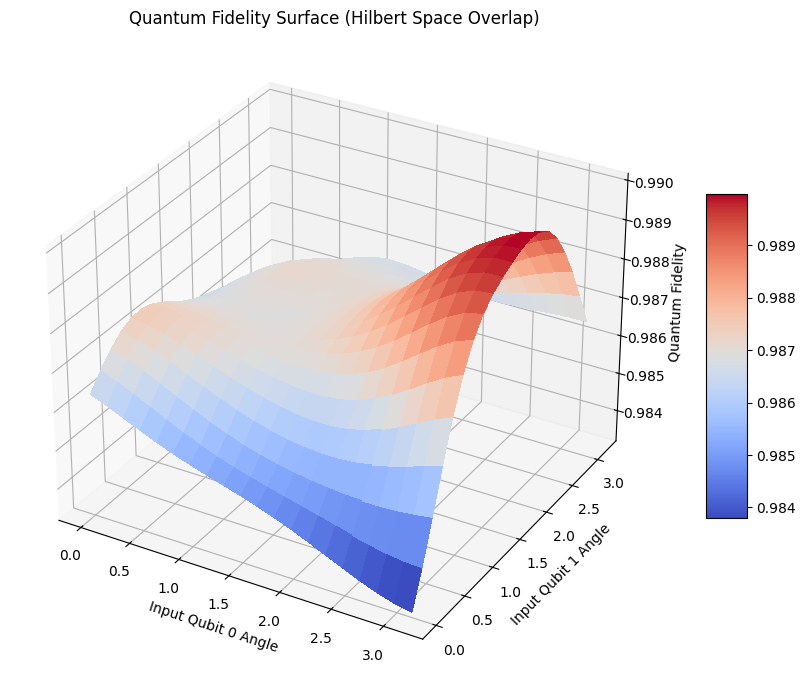

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pennylane as qml
import torch

# QNN Architecture
n_qubits = 10
reupload_layers = 3
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def reuploading_state_qnode(inputs, weights):
    for l in range(reupload_layers):
        qml.AngleEmbedding(inputs, wires=range(n_qubits), rotation='Y')
        for i in range(n_qubits):
            qml.RX(weights[l, i, 0], wires=i)
            qml.RY(weights[l, i, 1], wires=i)
            qml.RZ(weights[l, i, 2], wires=i)
        for i in range(n_qubits):
            qml.CZ(wires=[i, (i + 1) % n_qubits])
    return qml.state()

# 2D Input grid
grid_points = 20
x_vals = torch.linspace(0, np.pi, grid_points)
y_vals = torch.linspace(0, np.pi, grid_points)
X, Y = torch.meshgrid(x_vals, y_vals, indexing='ij')

# Random fixed weights for fidelity surface
weights = torch.rand((reupload_layers, n_qubits, 3)) * np.pi
fidelity_surface = np.zeros((grid_points, grid_points))

# Compute Fidelity Surface
for i in range(grid_points):
    for j in range(grid_points):
        input1 = torch.zeros(n_qubits)
        input2 = torch.zeros(n_qubits)
        input1[0], input1[1] = X[i, j], Y[i, j]
        input2[0], input2[1] = X[i, j] + 0.1, Y[i, j] + 0.1

        state1 = reuploading_state_qnode(input1, weights)
        state2 = reuploading_state_qnode(input2, weights)

        fidelity = torch.abs(torch.dot(state1, state2.conj()))**2
        fidelity_surface[i, j] = fidelity.item()

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X.numpy(), Y.numpy(), fidelity_surface, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel('Input Qubit 0 Angle')
ax.set_ylabel('Input Qubit 1 Angle')
ax.set_zlabel('Quantum Fidelity')
ax.set_title('Quantum Fidelity Surface (Hilbert Space Overlap)')
fig.colorbar(surf, shrink=0.5, aspect=8)
plt.tight_layout()
plt.show()


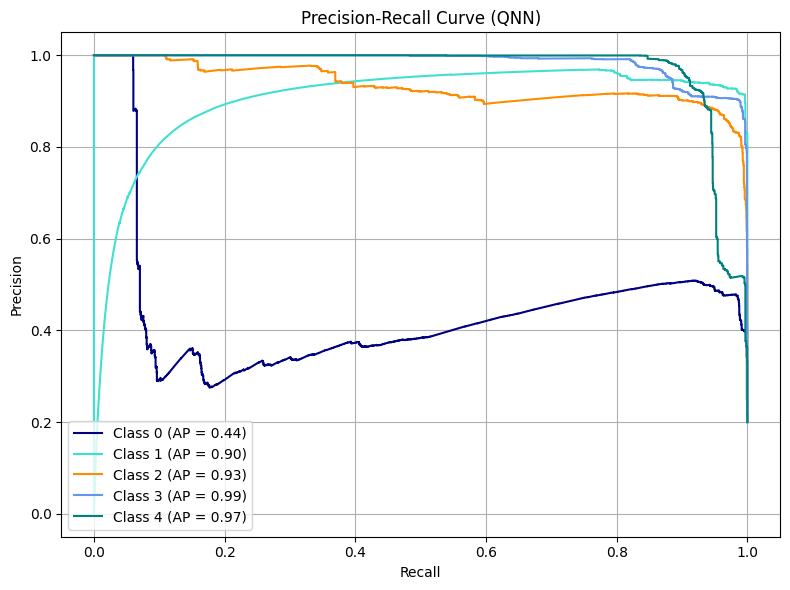

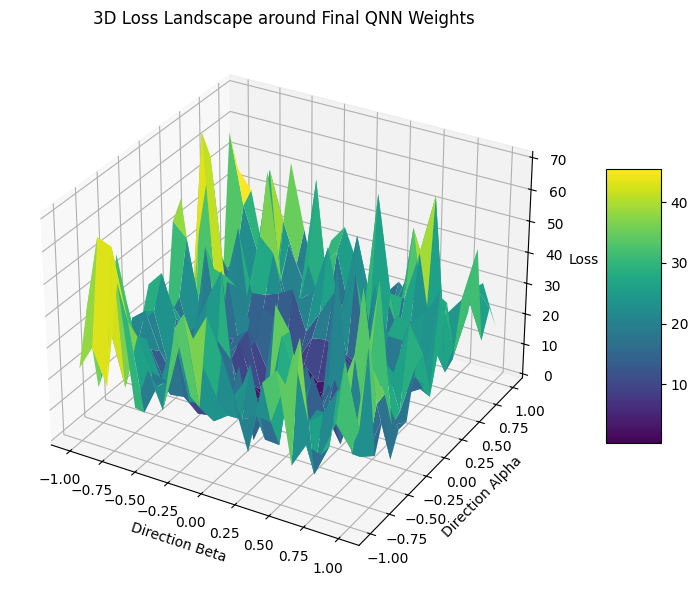

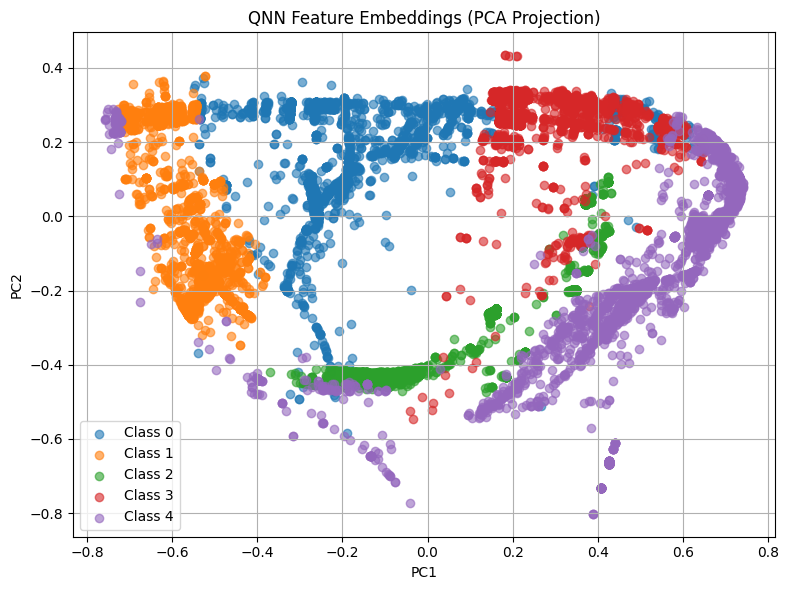

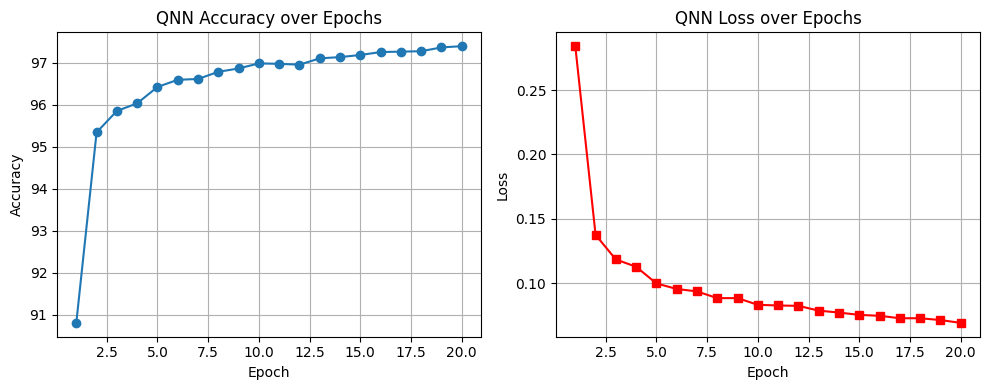

In [ ]:
# ✅ Precision-Recall Curve (Multi-class)
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize labels for multi-class
n_classes = len(np.unique(y_true))
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))
y_scores = test_outputs.detach().cpu().numpy()

plt.figure(figsize=(8, 6))
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

for i, color in zip(range(n_classes), colors):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_scores[:, i])
    ap = average_precision_score(y_true_bin[:, i], y_scores[:, i])
    plt.plot(recall, precision, color=color, label=f'Class {i} (AP = {ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Average Precision-Recall Curve (QNN)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Loss Landscape (3D around final weight)
import copy
from mpl_toolkits.mplot3d import Axes3D

# Pick two directions to perturb weights
model.eval()
base_weights = copy.deepcopy(list(model.parameters()))

alphas = np.linspace(-1, 1, 20)
betas = np.linspace(-1, 1, 20)
loss_surface = np.zeros((len(alphas), len(betas)))

# Use only a subset of data
X_sample, y_sample = next(iter(train_loader))

for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        temp_model = copy.deepcopy(model)
        with torch.no_grad():
            for param, base in zip(temp_model.parameters(), base_weights):
                perturb = alpha * torch.randn_like(base) + beta * torch.randn_like(base)
                param.copy_(base + perturb)
        output = temp_model(X_sample)
        loss = criterion(output, y_sample)
        loss_surface[i, j] = loss.item()

X, Y = np.meshgrid(betas, alphas)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, loss_surface, cmap='viridis')
ax.set_xlabel('Direction Beta')
ax.set_ylabel('Direction Alpha')
ax.set_zlabel('Loss')
ax.set_title('3D Loss Landscape around Final QNN Weights')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()

# ✅ QNN Feature Map (PCA on QNN output)
from sklearn.decomposition import PCA

model.eval()
with torch.no_grad():
    qnn_features = model.q_layer(Xq_test_tensor).detach().cpu().numpy()

pca = PCA(n_components=2)
projected = pca.fit_transform(qnn_features)

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    idx = yq_test_tensor.cpu().numpy() == i
    plt.scatter(projected[idx, 0], projected[idx, 1], label=f'Class {i}', alpha=0.6)

plt.title('QNN Feature Embeddings (PCA Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Training Dynamics: Accuracy, Loss, Gradient Norms
# Suppose you collected these during training
qnn_acc = [90.81, 95.34, 95.85, 96.03, 96.42, 96.59, 96.61, 96.78, 96.86, 96.98,
           96.97, 96.95, 97.10, 97.13, 97.18, 97.25, 97.26, 97.27, 97.36, 97.39]
qnn_loss = [0.2840, 0.1376, 0.1186, 0.1129, 0.1000, 0.0957, 0.0938, 0.0886, 0.0886, 0.0834,
            0.0829, 0.0826, 0.0789, 0.0774, 0.0756, 0.0749, 0.0730, 0.0730, 0.0716, 0.0694]

epochs = list(range(1, len(qnn_acc)+1))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, qnn_acc, marker='o', label='Accuracy (%)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('QNN Accuracy over Epochs')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, qnn_loss, marker='s', color='red', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('QNN Loss over Epochs')
plt.grid(True)

plt.tight_layout()
plt.show()


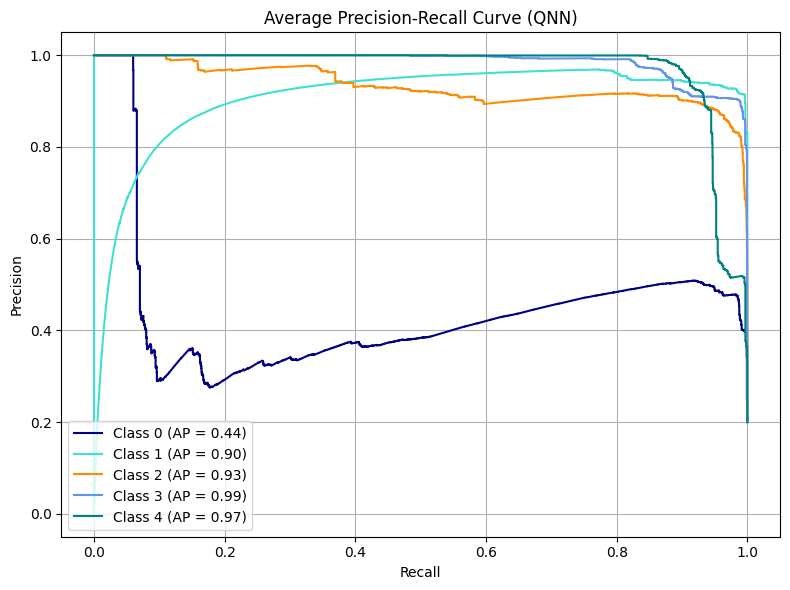

In [ ]:
# ✅ Precision-Recall Curve (Multi-class)
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize labels for multi-class
n_classes = len(np.unique(y_true))
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))
y_scores = test_outputs.detach().cpu().numpy()

plt.figure(figsize=(8, 6))
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

for i, color in zip(range(n_classes), colors):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_scores[:, i])
    ap = average_precision_score(y_true_bin[:, i], y_scores[:, i])
    plt.plot(recall, precision, color=color, label=f'Class {i} (AP = {ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Average Precision-Recall Curve (QNN)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

# **VISUALS**

In [ ]:
import seaborn

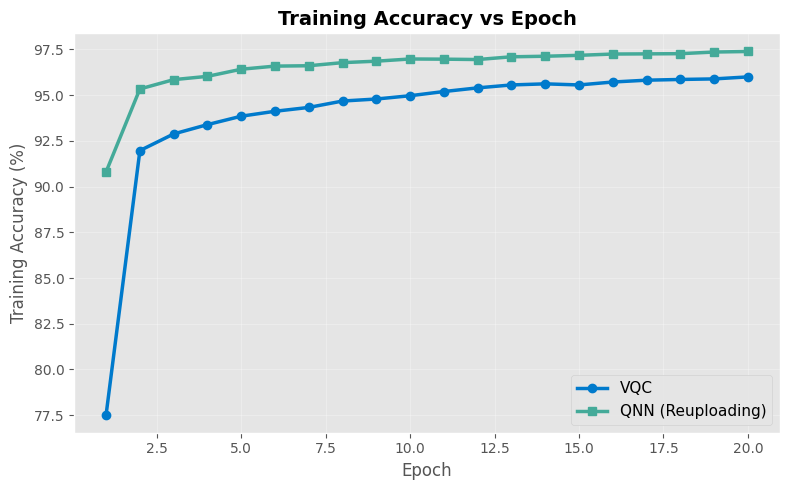

In [ ]:
import matplotlib.pyplot as plt

vqc_acc = [77.53, 91.97, 92.88, 93.39, 93.85, 94.12, 94.33, 94.68, 94.79, 94.97,
           95.20, 95.40, 95.56, 95.62, 95.56, 95.72, 95.82, 95.86, 95.89, 96.00]
qnn_acc = [90.81, 95.34, 95.85, 96.03, 96.42, 96.59, 96.61, 96.78, 96.86, 96.98,
           96.97, 96.95, 97.10, 97.13, 97.18, 97.25, 97.26, 97.27, 97.36, 97.39]

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(epochs, vqc_acc, label='VQC', marker='o', linewidth=2.5, color="#007acc")
ax.plot(epochs, qnn_acc, label='QNN (Reuploading)', marker='s', linewidth=2.5, color="#44aa99")

# Style
ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("Training Accuracy (%)", fontsize=12)
ax.set_title("Training Accuracy vs Epoch", fontsize=14, weight='bold')
ax.legend(fontsize=11)
ax.tick_params(axis='both', labelsize=10)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()



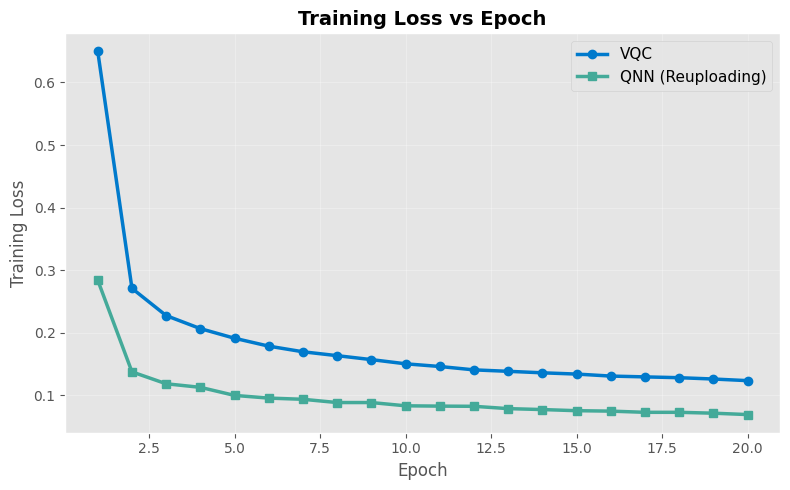

In [ ]:
vqc_loss = [0.6494, 0.2710, 0.2275, 0.2067, 0.1913, 0.1787, 0.1697, 0.1635, 0.1572, 0.1505,
            0.1462, 0.1408, 0.1385, 0.1361, 0.1341, 0.1309, 0.1296, 0.1283, 0.1262, 0.1236]
qnn_loss = [0.2840, 0.1376, 0.1186, 0.1129, 0.1000, 0.0957, 0.0938, 0.0886, 0.0886, 0.0834,
            0.0829, 0.0826, 0.0789, 0.0774, 0.0756, 0.0749, 0.0730, 0.0730, 0.0716, 0.0694]

import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Define the figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot lines
ax.plot(epochs, vqc_loss, label='VQC', marker='o', linewidth=2.5, color="#007acc")
ax.plot(epochs, qnn_loss, label='QNN (Reuploading)', marker='s', linewidth=2.5, color="#44aa99")

# Style
ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("Training Loss", fontsize=12)
ax.set_title("Training Loss vs Epoch", fontsize=14, weight='bold')
ax.legend(fontsize=11)
ax.tick_params(axis='both', labelsize=10)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()



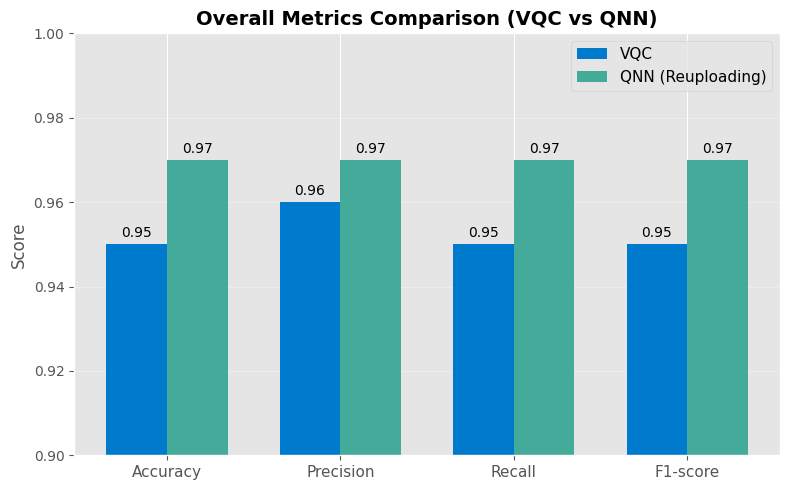

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
vqc_metrics = [0.95, 0.96, 0.95, 0.95]
qnn_metrics = [0.97, 0.97, 0.97, 0.97]
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = np.arange(len(labels))
width = 0.35

# Set figure and style
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#007acc', '#44aa99']

# Plot bars
bars1 = ax.bar(x - width/2, vqc_metrics, width, label='VQC', color=colors[0])
bars2 = ax.bar(x + width/2, qnn_metrics, width, label='QNN (Reuploading)', color=colors[1])

# Add values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', fontsize=10)

# Labels and title
ax.set_ylabel('Score', fontsize=12)
ax.set_ylim(0.90, 1.00)
ax.set_title('Overall Metrics Comparison (VQC vs QNN)', fontsize=14, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


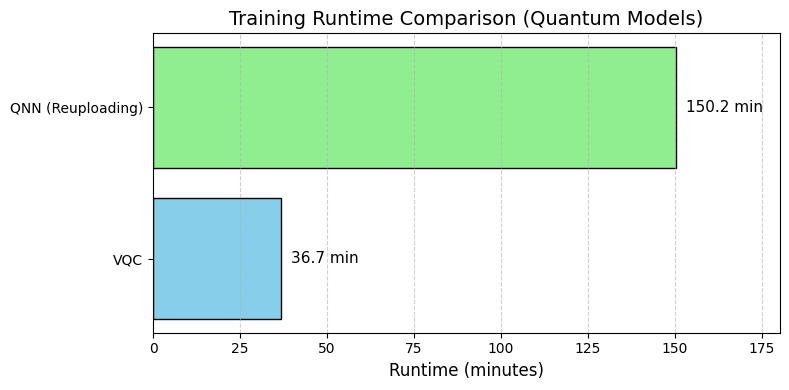

In [ ]:
import matplotlib.pyplot as plt

models = ['VQC', 'QNN (Reuploading)']
runtime = [36.7, 150.2]

colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(8, 4))
bars = plt.barh(models, runtime, color=colors, edgecolor='black')

# Annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 3, bar.get_y() + bar.get_height()/2,
             f'{width:.1f} min', va='center', fontsize=11)

plt.title('Training Runtime Comparison (Quantum Models)', fontsize=14)
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.xlim(0, max(runtime) + 30)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

vqc_params = count_parameters(QuantumClassifier())
qnn_params = count_parameters(ReuploadingQNN())
print(f"VQC params: {vqc_params}, QNN params: {qnn_params}")


VQC params: 351, QNN params: 351
